.pandas is a software library written for the Python programming language for data manipulation and analysis.
.NumPymis a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
.Matplotlib is a plotting library for Python. It is used along with NumPy to provide an environment that is an effective open source alternative for MatLab.
.matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB.
.Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

In [716]:
import pandas as pd
import numpy  as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('seaborn')

 We will create a model that attempts to predict the temperature in New York for a given month, day and hour.

preparing data

In [717]:
city_temp=pd.read_csv("../data/raw/temperature.csv", parse_dates=['datetime'])
city_humid=pd.read_csv("../data/raw/humidity.csv",parse_dates=['datetime'])
city_press=pd.read_csv("../data/raw/pressure.csv",parse_dates=['datetime'])
city_speed=pd.read_csv("../data/raw/wind_speed.csv",parse_dates=['datetime'])
city_dir=pd.read_csv("../data/raw/wind_direction.csv",parse_dates=['datetime'])
city_taxi=pd.read_csv("../data/raw/Taxi-NYC.csv",parse_dates=['datetime'])
city_temp.sample(5)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
21236,2015-03-05 08:00:00,276.15,271.753667,282.620333,273.620333,275.770333,275.545333,269.853667,279.812,267.612,...,274.487,275.32,265.89,274.103667,288.510000,291.49,292.190000,292.120000,288.150000,286.687
5278,2013-05-09 10:00:00,285.03,283.550000,284.930000,283.920000,287.950000,286.310000,287.420000,289.830,280.440,...,288.540,288.01,285.24,284.430000,303.900000,297.43,307.830000,297.100000,297.100000,304.100
9712,2013-11-10 04:00:00,281.01,280.710000,285.890000,280.620000,286.770000,286.200000,288.810000,290.260,280.050,...,277.840,280.82,274.96,277.470000,282.247000,288.15,292.150000,290.588000,293.213000,283.318
11908,2014-02-09 16:00:00,270.29,271.660000,286.650000,272.640000,285.580000,284.770000,280.660000,285.510,279.260,...,270.250,269.75,264.35,270.130000,282.485667,289.77,283.377333,288.827333,288.827333,289.460
44814,2017-11-11 18:00:00,NaN,283.140000,NaN,280.150000,289.320000,289.350000,290.790000,294.590,290.670,...,276.150,NaN,270.15,274.490000,NaN,NaN,NaN,NaN,NaN,NaN


For each city we have timeseries in a column. We are going to chose New York as our chosen city and temperature as our chosen feature. It is better to convert the temperature to Celsius.

In [718]:
data=city_temp[['datetime','New York']]
data=data.rename(columns={'New York':'temperature'})
data.head(5)
data['hour'] = data.datetime.dt.hour
sample = data[:168]

In [719]:
data_humid=city_humid[['datetime','New York']]
data_humid=data_humid.rename(columns={'New York':'humidity'})


In [720]:
city_press.sample(5)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
32212,2016-06-04 16:00:00,1021.0,1016.0,1011.0,1021.0,1015.0,1016.0,1016.0,1012.0,1025.0,...,1016.0,1016.0,1016.0,1016.0,982.0,1008.0,1005.0,1009.0,1009.0,1008.0
11249,2014-01-13 05:00:00,1025.0,1029.0,1025.0,1023.0,1006.0,1031.0,1025.0,1021.0,1021.0,...,1024.0,1020.0,1012.0,1013.0,998.0,1022.0,1024.0,1028.0,1028.0,1000.0
34913,2016-09-25 05:00:00,958.0,1028.0,1017.0,1027.0,1014.0,1017.0,1014.0,1013.0,1015.0,...,1021.0,1020.0,1015.0,1017.0,983.0,1011.0,967.0,1008.0,1022.0,1011.0
5282,2013-05-09 14:00:00,NaN,1020.0,1019.0,1020.0,1019.0,NaN,1016.0,NaN,1019.0,...,1016.0,1018.0,1020.0,1017.0,962.0,1009.0,1006.0,1011.0,1011.0,985.0
1490,2012-12-02 14:00:00,995.0,1005.0,1015.0,1001.0,1021.0,1021.0,1018.0,1019.0,NaN,...,1032.0,NaN,NaN,1037.0,988.0,1004.0,1023.0,1013.0,1013.0,993.0


In [721]:
data_press=city_press[['datetime','New York']]
data_press=data_press.rename(columns={'New York':'pressure'})
data_press.head(5)

,datetime,pressure
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,1012.0
2,2012-10-01 14:00:00,1012.0
3,2012-10-01 15:00:00,1012.0
4,2012-10-01 16:00:00,1012.0


In [722]:
data_speed=city_speed[['datetime','New York']]
data_speed=data_speed.rename(columns={'New York':'wind_speed'})
data_speed.head(5)

,datetime,wind_speed
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,7.0
2,2012-10-01 14:00:00,7.0
3,2012-10-01 15:00:00,7.0
4,2012-10-01 16:00:00,7.0


In [723]:
data_dir=city_dir[['datetime','New York']]
data_dir=data_dir.rename(columns={'New York':'wind_direction'})
data_dir.head(5)

,datetime,wind_direction
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,260.0
2,2012-10-01 14:00:00,260.0
3,2012-10-01 15:00:00,260.0
4,2012-10-01 16:00:00,260.0


In [724]:
data = data.fillna(method = 'bfill', axis=0).dropna()
data_press = data_press.fillna(method = 'bfill', axis=0).dropna()
data_humid = data_humid.fillna(method = 'bfill', axis=0).dropna()
data_dir = data_dir.fillna(method = 'bfill', axis=0).dropna()
data_speed = data_speed.fillna(method = 'bfill', axis=0).dropna()

In [725]:
total_data=pd.concat([data,data_humid['humidity'],data_press['pressure'],data_speed['wind_speed'],data_dir['wind_direction'],city_taxi['rides']], axis=1)


In [726]:
total_data['temperature']=total_data['temperature']-273.15

In [727]:
total_data['date']=total_data.datetime.dt.date

In [728]:
total_data.head(5)

,datetime,temperature,hour,humidity,pressure,wind_speed,wind_direction,rides,date
0,2012-10-01 12:00:00,15.070000,12,58.0,1012.0,7.0,260.0,31,2012-10-01
1,2012-10-01 13:00:00,15.070000,13,58.0,1012.0,7.0,260.0,31,2012-10-01
2,2012-10-01 14:00:00,15.097676,14,57.0,1012.0,7.0,260.0,30,2012-10-01
3,2012-10-01 15:00:00,15.176940,15,57.0,1012.0,7.0,260.0,30,2012-10-01
4,2012-10-01 16:00:00,15.256203,16,57.0,1012.0,7.0,260.0,30,2012-10-01


In [729]:
sample=total_data[['date','humidity','wind_speed','wind_direction','temperature','rides']]



we havesome missing value. All features's tend to be constant from one hour to the next, so we can use backfill to replace any missing values and drop the rest.

There is no missing value and there is no outlayer so our data looks good.

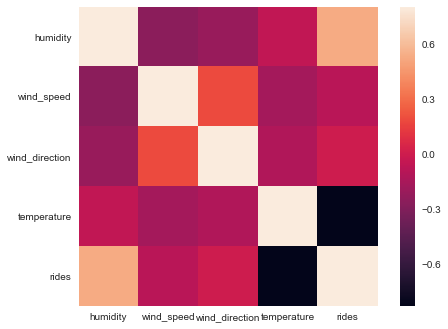

In [730]:
sample=total_data[['date','humidity','wind_speed','wind_direction','temperature','rides']]
corrmat = sample.corr()
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

Obviously we see negative correlation between temperature and wind speed.

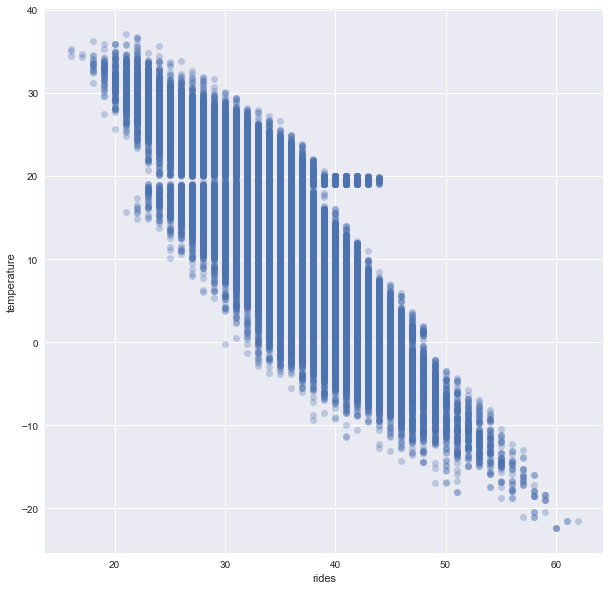

In [732]:
# Visualization of the correlation between temperature x wind_speed

plt.figure(figsize=(10,10))
plt.ylabel('temperature')
plt.xlabel('rides')

plt.plot(sample['rides'], sample['temperature'], 'o', alpha=0.3
        )
plt.show()

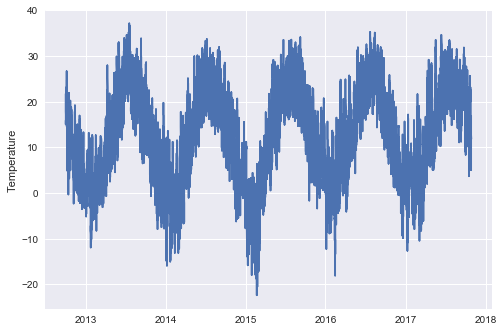

In [733]:

plt.plot(sample.date, sample.temperature)
plt.ylabel('Temperature');


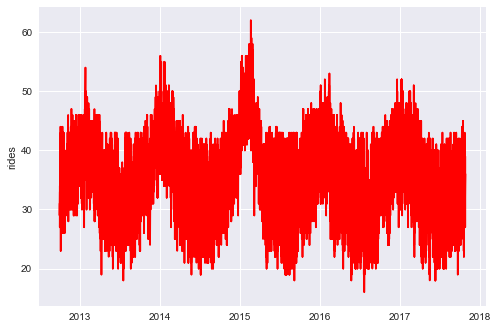

In [735]:
plt.plot(sample.date, sample.rides,'r')
plt.ylabel('rides');
plt.show()

# feature engineering

In [736]:
sample=total_data[['date','humidity','wind_speed','wind_direction','temperature','rides']]



count    44461.000000
mean        12.250469
std         10.220826
min        -22.376000
25%          4.220000
50%         12.720000
75%         20.610000
max         37.090000
Name: temperature, dtype: float64


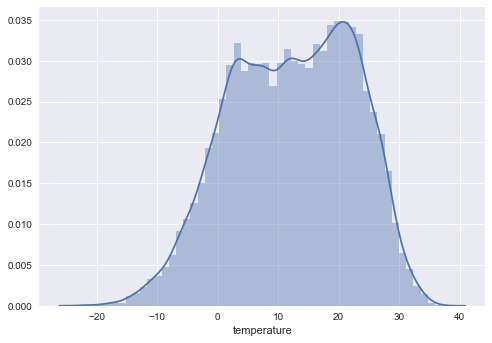

In [737]:
print(total_data.temperature.describe())
plot = sns.distplot(total_data.temperature)

count    44461.000000
mean        66.516790
std         19.884897
min         10.000000
25%         51.000000
50%         68.000000
75%         83.000000
max        100.000000
Name: humidity, dtype: float64


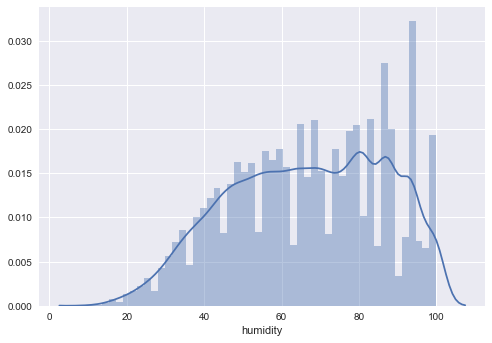

In [738]:
print(total_data.humidity.describe())
plot = sns.distplot(total_data.humidity)

count    44461.000000
mean      1017.021142
std         10.113110
min        959.000000
25%       1012.000000
50%       1017.000000
75%       1023.000000
max       1052.000000
Name: pressure, dtype: float64


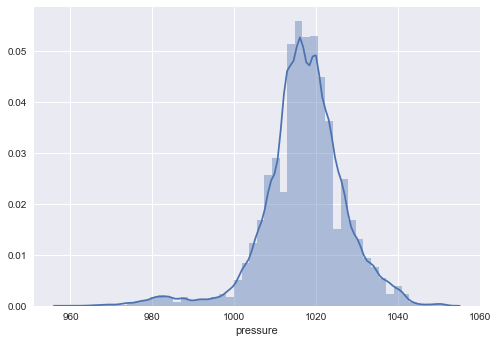

In [739]:
print(total_data.pressure.describe())
plot = sns.distplot(total_data.pressure)

count    44461.000000
mean         3.211039
std          2.189765
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         25.000000
Name: wind_speed, dtype: float64


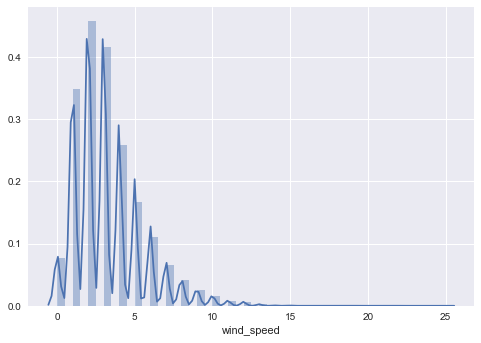

In [740]:
print(total_data.wind_speed.describe())
plot = sns.distplot(total_data.wind_speed)

count    44461.000000
mean       196.251681
std        107.432893
min          0.000000
25%        104.000000
50%        220.000000
75%        289.000000
max        360.000000
Name: wind_direction, dtype: float64


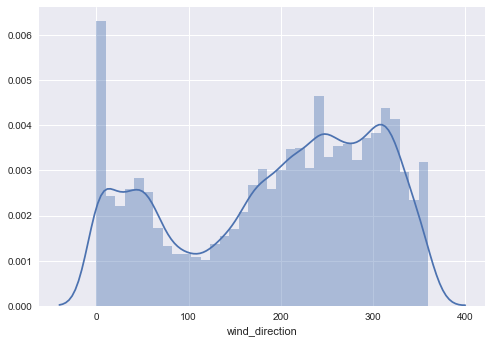

In [741]:
print(total_data.wind_direction.describe())
plot = sns.distplot(total_data.wind_direction)

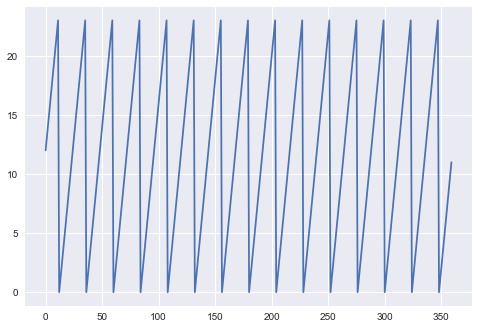

In [742]:
#We are going to extract the hours from the datetime
total_data['hour']=total_data.datetime.dt.hour
# chose a sample aproximatly 15 days
sample=total_data[:360]
sample['hour'].plot()

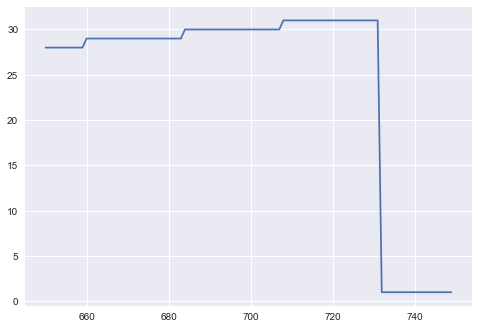

In [743]:
total_data['day']=total_data.datetime.dt.day
sample=total_data[650:750]
sample['day'].plot()

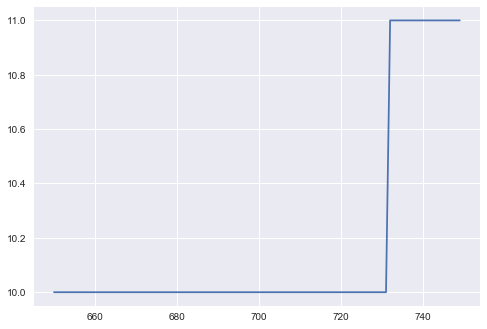

In [744]:
total_data['month']=total_data.datetime.dt.month
sample=total_data[650:750]
sample['month'].plot()

we need to see a cycle betwwn 0 and 23 that repeat 15 times. when the time goes from 23 to 0 we have a jump, so there is a problem about presenting syclical data to machine learning algorithem. we chose one day to have a look at the time arounf midnight

between record 34 and 35 : 23-22=1
between record 35 and 36 : 0-23=-23
so we need to change the encoding of the feature. A common method for encoding cyclical data is to transform the data into two dimensions using a sine and consine transformation.

we need to see a cycle betwwn 0 and 23 that repeat 15 times. when the time goes from 23 to 0 we have a jump, so there is a problem about presenting syclical data to machine learning algorithem. we chose one day to have a look at the time arounf midnight

In [745]:
def cyclical(dataset,column,max_v):
    dataset[column+'_sin']=np.sin(2*np.pi*dataset[column]/max_v)
    dataset[column+'_cos']=np.cos(2*np.pi*dataset[column]/max_v)
    return dataset


In [746]:
total_data.head(5)

,datetime,temperature,hour,humidity,pressure,wind_speed,wind_direction,rides,date,day,month
0,2012-10-01 12:00:00,15.070000,12,58.0,1012.0,7.0,260.0,31,2012-10-01,1,10
1,2012-10-01 13:00:00,15.070000,13,58.0,1012.0,7.0,260.0,31,2012-10-01,1,10
2,2012-10-01 14:00:00,15.097676,14,57.0,1012.0,7.0,260.0,30,2012-10-01,1,10
3,2012-10-01 15:00:00,15.176940,15,57.0,1012.0,7.0,260.0,30,2012-10-01,1,10
4,2012-10-01 16:00:00,15.256203,16,57.0,1012.0,7.0,260.0,30,2012-10-01,1,10


between record 34 and 35 : 23-22=1
between record 35 and 36 : 0-23=-23
so we need to change the encoding of the feature. A common method for encoding cyclical data is to transform the data into two dimensions using a sine and consine transformation.

In [747]:
total_data= cyclical(total_data,'hour',23.0)
total_data= cyclical(total_data,'day',365.0)
total_data= cyclical(total_data,'month',12.0)

In [748]:
total_data['year']=total_data.datetime.dt.year
total_data=total_data[total_data.year==2015]    
total_data=total_data[['year','hour_sin','hour_cos','day_sin','day_cos','month_sin','month_cos','humidity','wind_speed','wind_direction','temperature','day','month','hour','rides']]
total_data.head(5)


,year,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,humidity,wind_speed,wind_direction,temperature,day,month,hour,rides
19716,2015,0.000000,1.000000,0.017213,0.999852,0.5,0.866025,59.0,2.0,249.0,-5.100,1,1,0,46
19717,2015,0.269797,0.962917,0.017213,0.999852,0.5,0.866025,59.0,2.0,249.0,-5.100,1,1,1,46
19718,2015,0.519584,0.854419,0.017213,0.999852,0.5,0.866025,58.0,2.0,246.0,-5.964,1,1,2,46
19719,2015,0.730836,0.682553,0.017213,0.999852,0.5,0.866025,58.0,2.0,246.0,-5.964,1,1,3,46
19720,2015,0.887885,0.460065,0.017213,0.999852,0.5,0.866025,58.0,2.0,246.0,-5.964,1,1,4,46


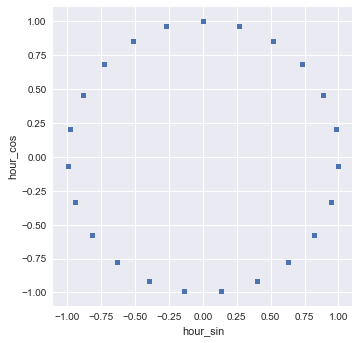

In [749]:
total_data.plot.scatter('hour_sin','hour_cos').set_aspect('equal')

In [750]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(total_data, test_size=0.4)
data_test, data_val = train_test_split(data_test, test_size=0.5)

In [751]:
#from keras.models import Sequential, Model
#from keras.layers import Input, Dense, Activation
#from keras.optimizers import Adam

#def train_model(X_train, y_train, X_test, y_test, epochs):
#    model = Sequential(
 #       [
  #          Dense(10, activation="relu", input_shape=(X_train.shape[1],)),
#             Dense(10, activation="relu"),
#             Dense(10, activation="relu"),
   #         Dense(1, activation="linear")
    #    ]
   # )
    #model.compile(optimizer=Adam(), loss="mean_squared_error")
    
    #history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))
    #return model, history

In [752]:
#def get_unencoded_features(df):
#    return df[['month', 'day', 'hour']]

In [753]:
#X_train = get_unencoded_features(data_train)
#X_test  = get_unencoded_features(data_test)
#y_train = data_train.temperature
#y_test  = data_test.temperature

In [754]:
#model_unencoded, unencoded_hist = train_model(
#    get_unencoded_features(data_train),
#    data_train.temperature,
#    get_unencoded_features(data_test),
#    data_test.temperature,
#    epochs=5
#)

In [755]:
#def get_encoded_features(df):
#    return df[['month_sin', 'month_cos', 'day_sin', 'day_cos', 'hour_sin', 'hour_cos']]

In [756]:
#X_train = get_encoded_features(data_train)
#X_test  = get_encoded_features(data_test)
#y_train = data_train.temperature
#y_test  = data_test.temperature

In [757]:
#model_encoded, encoded_hist = train_model(
 #   get_encoded_features(data_train),
 #   data_train.temperature,
 #   get_encoded_features(data_test),
 #   data_test.temperature,
 #   epochs=5
#)

In [758]:
#plt.plot(unencoded_hist.history['val_loss'], "r")
#ax = plt.plot(encoded_hist.history['val_loss'], "b")

now, it is prefect to present as a cyclical feature for machine learning algorithms.

Let's split our data into training and test sets.

# training and Test


In [759]:
# split the data
#X_columns=['hour_sin','hour_cos','day_sin','day_cos','month_sin','month_cos','humidity','wind_speed','wind_direction']
X_columns=['humidity','wind_speed','wind_direction','month_sin','month_cos','temperature']
#X_columns=['hour','day','month']
y_column=['rides']


threshold = 0.8
X = total_data[X_columns]
y = total_data[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)


X_train (7008, 6)
y_train (7008, 1)
X_test (1752, 6)
y_test (1752, 1)


Model Training / Evaluation - Using Split

In [760]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
models = [
    ('LinearRegression', LinearRegression()),
    ('RandomForestRegressor', RandomForestRegressor())
]
results = []
for m in models:
    print('MODEL', m[0])
    model = m[1]
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('MAE', mae)
    print('RMSE', rmse)
    # print the chart
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot(range(0,5000000, 100), range(0,5000000, 100), '--r', alpha=0.3, label='Line1')
    plt.title(m[0])
    plt.xlabel('True Value')
    plt.ylabel('Predict Value')
    plt.xlim([0, 5000000])
    plt.ylim([0, 5000000])
    plt.show()
    results.append([m[0], mae, rmse])
    
    # if there is a feature importance, print top 5
    importance = []
    if hasattr(model, 'feature_importances_'):
        print('Feature Importance')
        importance = []
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.feature_importances_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head())
    elif hasattr(model, 'coef_'):
        print('Feature Importance')
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.coef_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head())
        
    print('')

# sort the results and print as a table
df_results = pd.DataFrame(results)
df_results.columns = ['model', 'mae', 'rmse']
df_results = df_results.sort_values(by='mae')
df_results

MODEL LinearRegression


NameError: name 'mean_absolute_error' is not defined

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# feature importance
importance = []
for i in range(len(X_columns)):
    importance.append([X_columns[i], model.feature_importances_[i]])
pd.DataFrame(importance).sort_values(by=1, ascending=False)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('MAE', mean_absolute_error(y_test, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

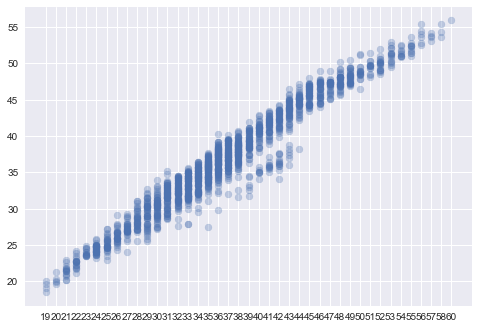

In [761]:
plt.scatter(y_test, y_pred, alpha=0.3)
plt.show()